# Time to revert for enwiki ns0, by bot type

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

## Load comment classified dataset

In [2]:
with open("../comments/df_all_comments_parsed.pickle", "rb") as f:
    df_all = pickle.load(f)

In [3]:
len(df_all)

1843935

In [4]:
df_all[0:2].transpose()

reverting_timestamp_dt,2009-02-28 02:19:25,2009-02-10 23:03:37
archived,False,False
language,en,en
page_namespace,0,1
rev_deleted,False,False
rev_id,273691771,136526894
rev_minor_edit,False,False
rev_page,5040439,3046554
rev_parent_id,2.59117e+08,1.20932e+08
rev_revert_offset,1,1
rev_sha1,qj45ne2z4yfexmpaz5wfnbm2yrmqt4j,3xtnw7u4w9h6cg1smw97mqnr1en6a55


In [5]:
df_all.replace("interwiki link cleanup -- suspected", "interwiki link cleanup", inplace=True)

In [6]:
df_all.bottype.value_counts()

interwiki link cleanup                             1187158
fixing double redirect                              285406
AIV helperbot                                       148172
other                                                71533
has per justification                                41190
template cleanup                                     35786
archiving                                            31826
clearing sandbox                                     10468
other w/ revert in comment                           10112
moving category                                       8264
protection template cleanup                           6084
category redirect cleanup                             4186
mathbot mathlist updates                              1034
botfight: reverting CommonsDelinker                    732
botfight: Cyberbot II vs AnomieBOT date tagging        602
redirect tagging/sorting                               594
botfight: 718bot vs ImageRemovalBot                    3

In [7]:
df_all['time_to_revert_days_log10'] = df_all['time_to_revert_days'].apply(np.log10)
df_all['time_to_revert_hrs_log10'] = df_all['time_to_revert_hrs'].apply(np.log10)

In [8]:
df_all['time_to_revert_days_log10'].describe()

count    1.843929e+06
mean     1.274776e+00
std      1.647900e+00
min     -4.936514e+00
25%      5.211653e-01
50%      1.789998e+00
75%      2.509835e+00
max      3.683402e+00
Name: time_to_revert_days_log10, dtype: float64

In [9]:
df_en_ns0 = df_all.query("language == 'en' and page_namespace == 0").copy()

In [10]:
df_en_ns0.bottype.value_counts()

interwiki link cleanup                             242440
fixing double redirect                             220172
protection template cleanup                          5674
moving category                                      4672
other                                                4530
category redirect cleanup                            2824
template cleanup                                     2318
other w/ revert in comment                           2014
mathbot mathlist updates                             1028
has per justification                                 716
botfight: Cyberbot II vs AnomieBOT date tagging       602
redirect tagging/sorting                              594
botfight: reverting CommonsDelinker                   460
botfight: 718bot vs ImageRemovalBot                   340
botfight: infoboxneeded                               196
link syntax fixing                                    160
template tagging                                       48
commons image 

## Consolidate bottypes

In [11]:
def bottype_group(bottype):
    if bottype == "interwiki link cleanup -- suspected":
        return "interwiki link cleanup"
    
    elif bottype == "interwiki link cleanup":
        return "interwiki link cleanup"
    
    elif bottype.find("botfight") >= 0:
        return 'botfight'
    
    elif bottype == 'other':
        return 'not classified'
    
    elif bottype == 'fixing double redirect':
        return 'fixing double redirect'
    
    elif bottype == 'protection template cleanup':
        return 'protection template cleanup'
    
    elif bottype.find("category") >= 0:
        return 'category work'
    
    elif bottype.find("template") >= 0:
        return 'template work'
    
    elif bottype == "other w/ revert in comment":
        return "other w/ revert in comment"
    
    else:
        return "other classified"

In [12]:
df_en_ns0['bottype_consolidated'] = df_en_ns0['bottype'].apply(bottype_group)

# Plots
## enwiki ns0, bottype consolidated, 0-60 days

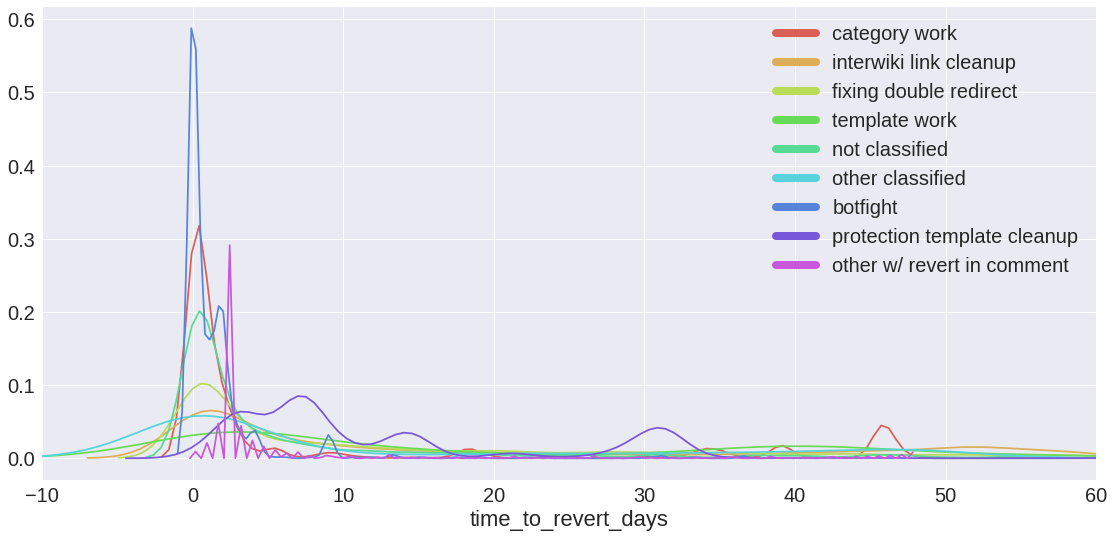

In [13]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_en_ns0, palette=pal, hue="bottype_consolidated", size=8, aspect=2, xlim=[-10,60])
g.map(sns.kdeplot, "time_to_revert_days", clip=[0,(60)])
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

## enwiki ns0, bottype consolidated, 0-60 days, log time to revert

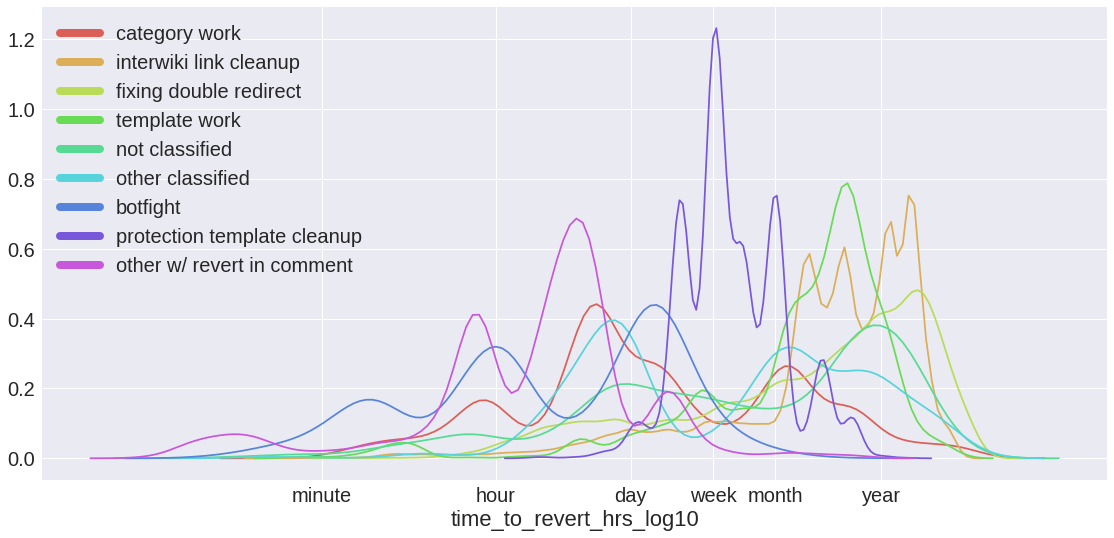

In [14]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_en_ns0, palette=pal, hue="bottype_consolidated", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)
    
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

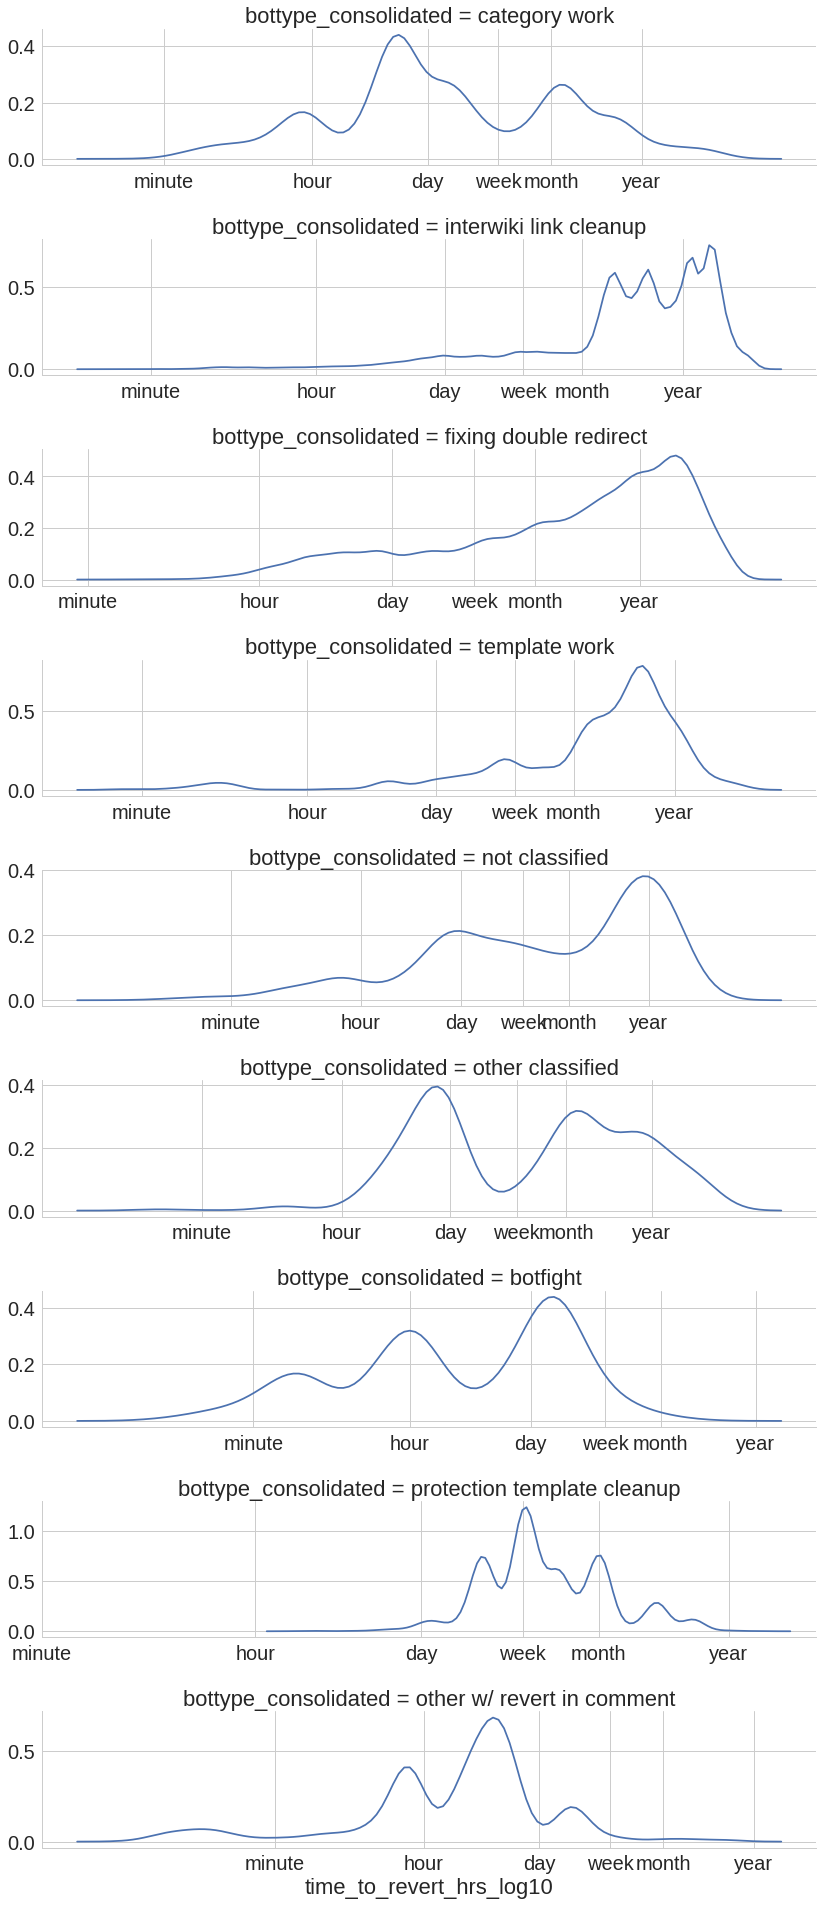

In [26]:
sns.set(style="whitegrid", font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal,
                  row="bottype_consolidated",
                  size=3, aspect=4,
                  sharex=False, sharey=False)

g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

In [16]:
assert False is True

AssertionError: 

### Individual cases paneled

In [ ]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal, row="bottype", size=3, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

#g.add_legend()
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)



## enwiki ns0, all bottypes, 0-2 years, shared X axis

In [ ]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal, row="bottype", size=3, aspect=4, sharex=False, sharey=False, xlim=[0,365*2])
g.map(sns.kdeplot, "time_to_revert_hrs_log10", clip=[0,(365*2)])
#g.add_legend()
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

In [ ]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal, row="bottype", size=2.5, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_days_log")
#g.add_legend()
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

## enwiki ns0, all bottypes, 0-2 years, no shared X axis

In [ ]:
sns.set(font_scale=2)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_en_ns0, palette=pal, row="bottype", size=2.5, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_days", clip=[0,(365*2)])
#g.add_legend()
leg = plt.legend()

for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)